# Introduccion

Este notebook contiene los procesos que se han realizado para limpiar las bases de datos de contratos del sistema RENOVA de la SUPERINTENDENCIA DE VIGILANCIA Y SEGURIDAD PRIVADA DE COLOMBIA. 

Contiene las funciones e scripts para cargar los datasets en Jupyter o Colab, a partir de archivos en formato CSV. 

Esta es la primera etapa del trabajo con esstos datos. 


In [1]:
# First import the required libraries.
import io
import os
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

In [2]:
# Ajustar No Maximo de Columnas para mostrar
# pd.get_option("display.max_columns")
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_columns', 20) # reset to default

In [3]:
# Ajustar el tamaño máximo de columna que se muestra
#pd.get_option('display.max_colwidth')
pd.set_option('display.max_colwidth', -1) 
#pd.set_option('display.max_colwidth', 50)  # reset to default

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
# Ajustar el número máximo de filas para mostrar
#pd.get_option('display.max_rows')
pd.set_option('display.max_rows', None) # mostrar todas
#pd.set_option('display.max_rows', 60) # reset to default

In [5]:
#para poder ver los montos en valores con todas las cifras significativas en vez de notación científica
pd.set_option('display.float_format',  '{:,.2f}'.format)

# Step 1: **Data Loading**

## Load CSV into colab 
From Google Drive only (DO NOT RUN if in Jupyter):

In [6]:
# For Using Google Drive, (Only if executing notebook from Google colab):
from google.colab import drive
drive.mount('/content/drive')

# after that:
# <--- Refresh mounted Drive
# <--- Look for file and get the path link

Mounted at /content/drive


### Find the file

In [7]:
# Get the current directory
print(os.getcwd())
# Check if the directory exists
print(os.path.exists('../'))

/content
True


In [8]:
ls

drive/  sample_data/


In [9]:
cd /content/drive/MyDrive/Observatorio SPVS/

/content/drive/MyDrive/Observatorio SPVS


In [10]:
# To load a file into colab:

In [11]:
ls

 Alternativas.zip
'BD APO Personal'/
'BD DANE Encuesta Seguridad'/
'BD DANE Poblacion y Area de Municipios'/
'BD POLICIA - Delitos de impacto - 2009-2021'/
'BD RENOVA - Contratos cliente gobierno'/
'BD RENOVA - Contratos Todos los Clientes'/
'BD RENOVA - Delitos'/
'BD RENOVA - Empresas'/
'BD SECOP-II - Contratos'/
'Copy of fasecolda_dataset_4749202.csv'
 CU_Delitos/
 CU_Gasto/
'Documentos de Trabajo Proyecto Observatorio_12-22-2021.zip'
 DTS-Diagnoìstico.zip
 fasecolda_dataset_4749202.csv
 SWEETVIZ_REPORT.html
 temp.csv
 test2.csv


In [12]:
PATH = '/content/drive/MyDrive/Observatorio SPVS/BD SECOP-II - Contratos/SECOP-I-II-Completo.csv'
contratos_SECOP_df = pd.read_csv(PATH, encoding = 'utf-8') #, dtype='str' ) #, sep=':' )
contratos_SECOP_df.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (42,43,44,45,46,47,48) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(30835, 53)

## Códigos de Actividad UNSPSC

In [13]:
UNSPSC_codes_dict = {
'Servicio de Vigilancia y Seguridad Privada' : [ 
                'V1.92101501', # Servicios de vigilancia
                'V1.9212', # Seguridad y protección personal
                'V1.921215', # Servicios de guardias
                'V1.921217', # Servicios de sistemas de seguridad 
                'V1.93121503' # Servicios de seguridad para diplomáticos 
                ],
'Servicio de Asesoria, Consultoria e Investigacion' : [
                'V1.80111702', # Servicios de comprobación de referencias o antecedentes
                'V1.81141801', # Análisis de riesgo o seguridad
                'V1.921216', # Servicios de detectives
                ],
'Servicio de Capacitacion y Entrenamiento en Vigilancia y Seguridad Privada' : [
                'V1.86101709', # Servicios de capacitación en seguridad
                ],
'Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada' : [ 
                'V1.461516', # Equipo de seguridad y control
                'V1.461518', # Equipo y accesorios y suministros de control de explosivos
                #'V1.461519', # Equipo y accesorios y suministros para el control químico biológico
                'V1.4617', # Seguridad, vigilancia y detección
                'V1.461715', # Cerraduras y elementos de seguridad y accesorios
                'V1.461716', # Equipo de vigilancia y detección
                'V1.721517', # Servicios de instalación de sistemas de seguridad física e industrial
               ],
'Servicio de Transporte de Valores' : [
                'V1.78101503', # Transporte aéreo blindado
                'V1.78101705', # Transporte marítimo blindado
                'V1.921218', # Servicios de Carros blindados y transporte de valores
                #'V1.921219' # Servicios de seguridad marina
               ],
'Servicio de Fabricación y/o Arrendamiento de Vehículos Blindados' : [ 
                'V1.25101920' # Carros de Seguridad, Vehículos Comerciales, Militares y Particulares, Accesorios y Componentes
               ],
'Suministro de Armas': [
          'V1.460000', # Equipos y Suministros de Defensa, Orden Publico, Proteccion, Vigilancia y Seguridad
          'V1.4610', # Armas ligeras y munición
          'V1.461015', # Armas de fuego
          'V1.461016', # Munición
          'V1.461017', # Sistemas de manipulación de munición
          'V1.461018' # Accesorios de armas y municiones
          ]
}


# Se deben quitar 461519 y 921219 porque al revisar los contratos en detalle, se encontró que no corresponden con el sector, son insumos químicos y aseguramiento financiero


In [14]:
for categoria in UNSPSC_codes_dict:
    print (categoria, UNSPSC_codes_dict[categoria])

Servicio de Vigilancia y Seguridad Privada ['V1.92101501', 'V1.9212', 'V1.921215', 'V1.921217', 'V1.93121503']
Servicio de Asesoria, Consultoria e Investigacion ['V1.80111702', 'V1.81141801', 'V1.921216']
Servicio de Capacitacion y Entrenamiento en Vigilancia y Seguridad Privada ['V1.86101709']
Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada ['V1.461516', 'V1.461518', 'V1.4617', 'V1.461715', 'V1.461716', 'V1.721517']
Servicio de Transporte de Valores ['V1.78101503', 'V1.78101705', 'V1.921218']
Servicio de Fabricación y/o Arrendamiento de Vehículos Blindados ['V1.25101920']
Suministro de Armas ['V1.460000', 'V1.4610', 'V1.461015', 'V1.461016', 'V1.461017', 'V1.461018']


In [15]:
for categoria, lista in UNSPSC_codes_dict.items():
    print (categoria)
    for unspsc in lista:
         print(unspsc)

Servicio de Vigilancia y Seguridad Privada
V1.92101501
V1.9212
V1.921215
V1.921217
V1.93121503
Servicio de Asesoria, Consultoria e Investigacion
V1.80111702
V1.81141801
V1.921216
Servicio de Capacitacion y Entrenamiento en Vigilancia y Seguridad Privada
V1.86101709
Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada
V1.461516
V1.461518
V1.4617
V1.461715
V1.461716
V1.721517
Servicio de Transporte de Valores
V1.78101503
V1.78101705
V1.921218
Servicio de Fabricación y/o Arrendamiento de Vehículos Blindados
V1.25101920
Suministro de Armas
V1.460000
V1.4610
V1.461015
V1.461016
V1.461017
V1.461018


# Step 4: Estadísticas Descriptivas

In [16]:
PATH = '/content/drive/MyDrive/Observatorio SPVS/BD SECOP-II - Contratos/SECOP-I-II-Completo.csv'
contratos_SECOP_df = pd.read_csv(PATH, encoding = 'utf-8') #, dtype='str' ) #, sep=':' )
contratos_SECOP_df.shape

(30835, 53)

In [17]:
contratos_SECOP_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30835 entries, 0 to 30834
Data columns (total 53 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   uid                                 30835 non-null  object 
 1   numero_de_constancia                26957 non-null  object 
 2   numero_de_proceso                   26955 non-null  object 
 3   numero_de_contrato                  26952 non-null  object 
 4   anno_firma_contrato                 30835 non-null  int64  
 5   anno_cargue_secop                   30835 non-null  int64  
 6   orden                               30835 non-null  object 
 7   entidad_centralizada                30835 non-null  object 
 8   nombre_entidad                      30835 non-null  object 
 9   nit_entidad                         30835 non-null  object 
 10  codigo_entidad                      30835 non-null  int64  
 11  modalidad_de_contratacion           30835

In [18]:
contratos_SECOP_df['Valor_Contrato_Presente_2020'].describe()

count   30,740.00         
mean    620,851,666.08    
std     4,788,360,079.15  
min     1.12              
25%     2,771,874.96      
50%     11,307,766.13     
75%     86,585,782.00     
max     259,471,157,356.99
Name: Valor_Contrato_Presente_2020, dtype: float64

In [19]:
contratos_SECOP_df['valor_del_contrato'].describe()

count   30,835.00         
mean    529,386,466.03    
std     3,958,415,436.54  
min     0.00              
25%     2,550,000.00      
50%     9,958,073.00      
75%     76,637,263.00     
max     145,581,619,701.00
Name: valor_del_contrato, dtype: float64

In [20]:
contratos_SECOP_df.groupby(['Database',  'estado_contrato']).size()

Database  estado_contrato       
SECOP_I   Adjudicado                92   
          Celebrado                 19044
          Convocado                 494  
          Liquidado                 6959 
          Terminado sin Liquidar    368  
SECOP_II  Activo                    464  
          Borrador                  2    
          Cerrado                   178  
          En aprobación             1    
          En ejecución              1086 
          Modificado                1494 
          Suspendido                7    
          cedido                    6    
          enviado Proveedor         1    
          terminado                 639  
dtype: int64

In [21]:
contratos_SECOP_df.groupby(['Database', 'anno_firma_contrato', 'estado_contrato'])['Valor_Contrato_Presente_2020'].agg(sum).to_csv('temp.csv')

In [22]:
contratos_SECOP_df.groupby(['Database', 'anno_firma_contrato', 'estado_contrato'])['Valor_Contrato_Presente_2020'].size().to_frame().reset_index()['Valor_Contrato_Presente_2020'].to_csv('temp.csv')

## Sweetviz


In [23]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 3.9 MB/s 


In [24]:
sample = contratos_SECOP_df.sample(n=1000)

In [25]:
import sweetviz as sv

In [26]:
#%%time

#my_report = sv.analyze(sample)
#my_report.show_html()

In [27]:
ls

 Alternativas.zip
'BD APO Personal'/
'BD DANE Encuesta Seguridad'/
'BD DANE Poblacion y Area de Municipios'/
'BD POLICIA - Delitos de impacto - 2009-2021'/
'BD RENOVA - Contratos cliente gobierno'/
'BD RENOVA - Contratos Todos los Clientes'/
'BD RENOVA - Delitos'/
'BD RENOVA - Empresas'/
'BD SECOP-II - Contratos'/
'Copy of fasecolda_dataset_4749202.csv'
 CU_Delitos/
 CU_Gasto/
'Documentos de Trabajo Proyecto Observatorio_12-22-2021.zip'
 DTS-Diagnoìstico.zip
 fasecolda_dataset_4749202.csv
 SWEETVIZ_REPORT.html
 temp.csv
 test2.csv


## Tamaño económico del sector


### Gasto Acumulado Global

In [28]:
dataframe_SECOP = contratos_SECOP_df

In [29]:
'''
Variables X
'anno_firma_contrato'
'Anio-Mes'
'plazo_de_ejec_del_contrato'

Variables Y
'valor_del_contrato', 
'valor_total_de_adiciones',
'valor_contrato_con_adiciones'
'Valor_Contrato_Presente_2020'

Agrupaciones
'Tipo_servicio',
'codigo_de_categoria_principal', 
'nombre_clase'

Agrupaciones solo para SECOP II
'sector', 
'rama',
'es_grupo', 
'es_pyme',

Otras agrupaciones
'modalidad_de_contratacion'
'objeto_del_contrato'
'descripcion_del_proceso', 
'tipo_de_contrato'

Curiosidades
'orden'
'nacionalidad_representante_legal', 
'genero_representante_legal'
'''

"\nVariables X\n'anno_firma_contrato'\n'Anio-Mes'\n'plazo_de_ejec_del_contrato'\n\nVariables Y\n'valor_del_contrato', \n'valor_total_de_adiciones',\n'valor_contrato_con_adiciones'\n'Valor_Contrato_Presente_2020'\n\nAgrupaciones\n'Tipo_servicio',\n'codigo_de_categoria_principal', \n'nombre_clase'\n\nAgrupaciones solo para SECOP II\n'sector', \n'rama',\n'es_grupo', \n'es_pyme',\n\nOtras agrupaciones\n'modalidad_de_contratacion'\n'objeto_del_contrato'\n'descripcion_del_proceso', \n'tipo_de_contrato'\n\nCuriosidades\n'orden'\n'nacionalidad_representante_legal', \n'genero_representante_legal'\n"

In [30]:
dataframe_SECOP[['Tipo_servicio','Valor_Contrato_Presente_2020', 'Database']].groupby('Tipo_servicio').sum()


Valor_Contrato_Presente_2020
Tipo_servicio                                                                                                                                
Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada 1,367,225,491,276.38         
Servicio de Asesoria, Consultoria e Investigacion                                                               33,380,973,252.19            
Servicio de Capacitacion y Entrenamiento en Vigilancia y Seguridad Privada                                      19,380,537,736.74            
Servicio de Fabricación y/o Arrendamiento de Vehículos Blindados                                                222,550,444.01               
Servicio de Transporte de Valores                                                                               584,272,893,606.67           
Servicio de Vigilancia y Seguridad Privada                                                                      17,080,497,768,926.07

In [31]:
# Valor total de los contratos por tipo de cliente
fig = px.bar(dataframe_SECOP[['Tipo_servicio','Valor_Contrato_Presente_2020', 'Database']].groupby('Tipo_servicio').sum(), orientation = 'h', text_auto=True, log_x=True)  #
fig.show()

In [32]:
dataframe_SECOP[['Tipo_servicio', 'codigo_de_categoria_principal','nombre_clase','Valor_Contrato_Presente_2020', 'Database']].groupby(['Tipo_servicio', 'codigo_de_categoria_principal','nombre_clase']).sum()   # .transpose()

Valor_Contrato_Presente_2020
Tipo_servicio                                                                                                   codigo_de_categoria_principal nombre_clase                                                                                                 
Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada V1.46151600                   Equipo de seguridad y control                                                   39,232,344,466.36            
                                                                                                                V1.46151601                   Esposas                                                                         9,707,090.44                 
                                                                                                                V1.46151604                   Analizadores de alcohol                                                         320,575,238.22               
                                                                                                                V1.46151605                   Detectores de armas o explosivos y suministros                                  618,570,605.34               
                                                                                                                V1.46151606                   Kits de pruebas de narcóticos                                                   19,772,996.27                
                                                                                                                V1.46151608                   Dispositivos de protección contra bombas y suministros                          7,793,145,967.03             
                                                                                                                V1.46151609                   Discriminador de documentos de identificación                                   356,595,530.22               
                                                                                                                V1.46151800                   Equipo y accesorios y suministros de control de explosivos                      17,044,895,770.14            
                                                                                                                V1.46171500                   Cerraduras elementos de seguridad y accesorios                                  13,196,025,068.27            
                                                                                                                                              Cerraduras, elementos de seguridad y accesorios                                 1,109,244,414.73             
                                                                                                                V1.46171501                   Candados                                                                        221,143,768.64               
                                                                                                                V1.46171505                   Llaves                                                                          5,269,498.39                 
                                                                                                                V1.46171506                   Cajas fuertes                                                                   146,662,522.07               
                                                                                                                V1.46171507                   Barras de seguridad                                                             137,949,023.88               
                                                                                                                V1.46171508                   Candados de números                              

In [33]:
dataframe_SECOP[['Tipo_servicio', 'anno_firma_contrato' ,'Valor_Contrato_Presente_2020', 'Database']].groupby(['Tipo_servicio', 'anno_firma_contrato' ]).sum()   # .transpose()

Valor_Contrato_Presente_2020
Tipo_servicio                                                                                                   anno_firma_contrato                              
Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada 2002                5,274,590.26                 
                                                                                                                2005                5,652,283.80                 
                                                                                                                2008                2,210,976.84                 
                                                                                                                2009                176,901,516.96               
                                                                                                                2012                12,913,657.59                
                                                                                                                2013                7,629,421,094.97             
                                                                                                                2014                102,224,763,009.23           
                                                                                                                2015                136,185,176,638.88           
                                                                                                                2016                145,891,428,552.15           
                                                                                                                2017                167,778,751,814.08           
                                                                                                                2018                216,331,119,479.18           
                                                                                                                2019                148,874,169,530.05           
                                                                                                                2020                171,422,899,782.00           
                                                                                                                2021                200,770,248,875.21           
                                                                                                                2022                69,914,559,475.18            
Servicio de Asesoria, Consultoria e Investigacion                                                               2018                715,452,369.17               
                                                                                                                2019                531,500,679.28               
                                                                                                                2020                634,707,810.00               
                                                                                                                2021                30,029,872,052.11            
                                                                                                                2022                1,469,440,341.64             
Servicio de Capacitacion y Entrenamiento en Vigilancia y Seguridad Privada                                      2017                805,167,867.69               
                                                                                                                2018                3,393,748,370.32             
                                                                                                                2019                356,070,365.86               
                                                                                   

In [34]:
# Valor total de los contratos por tipo de Servicio
fig = px.bar(dataframe_SECOP[dataframe_SECOP['Tipo_servicio'] == 'Servicio de Vigilancia y Seguridad Privada'][['nombre_clase','Valor_Contrato_Presente_2020', 'Database']].groupby('nombre_clase').sum(), orientation = 'h', text_auto=True, log_x=True)
fig.show()

In [35]:
# Valor total de los contratos por tipo de Servicio
fig = px.bar(dataframe_SECOP[dataframe_SECOP['Tipo_servicio'] == 'Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada'][['nombre_clase','Valor_Contrato_Presente_2020', 'Database']].groupby('nombre_clase').sum(), orientation = 'h', text_auto=True, log_x=True)
fig.show()

In [36]:
# Valor total de los contratos por tipo de Servicio
fig = px.bar(dataframe_SECOP[dataframe_SECOP['Tipo_servicio'].isin(['Servicio de Fabricación y/o Arrendamiento de Vehículos Blindados',
                                                                   'Servicio de Transporte de Valores'])][['nombre_clase','Valor_Contrato_Presente_2020', 'Database']].groupby('nombre_clase').sum(), orientation = 'h', text_auto=True, log_x=True)
fig.update_layout(autosize=False, width=1000, height=250,)
fig.show()

In [37]:
# Valor total de los contratos por tipo de Servici0o
fig = px.bar(dataframe_SECOP[dataframe_SECOP['Tipo_servicio'].isin(['Servicio de Asesoria, Consultoria e Investigacion',
                                                                  'Servicio de Capacitacion y Entrenamiento en Vigilancia y Seguridad Privada'])][['nombre_clase','Valor_Contrato_Presente_2020', 'Database']].groupby('nombre_clase').sum(), orientation = 'h', text_auto=True, log_x=True)
fig.update_layout(autosize=False, width=1200, height=300,)
fig.show()

### Gasto Acumulado Anual

In [38]:
# Valores nominales de contratos
dataframe_SECOP[['valor_del_contrato', 'anno_firma_contrato']].groupby('anno_firma_contrato').sum()   # .transpose()

valor_del_contrato
anno_firma_contrato                     
2002                1,464,000.00        
2003                21,644,176.00       
2005                1,869,810.00        
2008                25,588,910.00       
2009                552,272,156.00      
2010                74,454,956.00       
2012                8,865,172,503.00    
2013                7,373,402,888.00    
2014                88,674,972,543.00   
2015                439,955,810,984.00  
2016                1,640,202,560,902.00
2017                2,220,220,222,870.00
2018                2,375,388,226,017.00
2019                2,037,008,137,337.00
2020                2,817,696,438,496.00
2021                3,198,273,472,429.00
2022                1,489,295,969,183.00

In [39]:
# Valor nominal de contratos con adiciones 
dataframe_SECOP[['valor_contrato_con_adiciones', 'anno_firma_contrato']].groupby('anno_firma_contrato').sum()   # .transpose()

valor_contrato_con_adiciones
anno_firma_contrato                              
2002                1,464,000.00                 
2003                21,644,176.00                
2005                1,869,810.00                 
2008                25,588,910.00                
2009                811,006,940.00               
2010                74,454,956.00                
2012                8,882,661,632.00             
2013                9,430,112,917.00             
2014                94,447,668,696.00            
2015                496,748,430,379.00           
2016                2,115,464,935,821.00         
2017                2,489,309,566,004.00         
2018                1,231,804,349,703.00         
2019                1,074,486,832,526.00         
2020                792,051,579,848.00           
2021                487,422,284,359.00           
2022                207,565,387,832.00

In [127]:
# Valor nominal de solamente las adiciones 
dataframe_SECOP[['valor_total_de_adiciones', 'anno_firma_contrato']].groupby('anno_firma_contrato').sum()   # .transpose()

valor_total_de_adiciones
anno_firma_contrato                          
2002                0.00                     
2003                0.00                     
2005                0.00                     
2008                0.00                     
2009                258,734,784.00           
2010                0.00                     
2012                17,489,129.00            
2013                2,056,710,029.00         
2014                5,772,696,153.00         
2015                56,792,619,395.00        
2016                490,233,247,404.00       
2017                486,527,063,165.00       
2018                178,099,410,333.00       
2019                170,015,065,935.00       
2020                117,465,476,211.00       
2021                51,299,253,624.00        
2022                4,380,396,582.00

In [40]:
dataframe_SECOP[['Valor_Contrato_real_2015', 'anno_firma_contrato']].groupby('anno_firma_contrato').sum()   # .transpose()

Valor_Contrato_real_2015
anno_firma_contrato                          
2002                2,575,227.38             
2003                35,538,181.68            
2005                2,759,629.71             
2008                32,065,909.37            
2009                975,323,242.50           
2010                87,554,034.83            
2012                9,789,975,571.82         
2013                10,187,669,188.13        
2014                99,160,479,234.39        
2015                496,748,430,379.00       
2016                1,981,520,140,533.82     
2017                2,413,525,291,600.27     
2018                2,205,408,849,645.27     
2019                1,841,221,777,751.17     
2020                2,388,403,316,084.55     
2021                2,554,907,146,222.61     
2022                1,085,709,054,377.17

In [41]:
dataframe_SECOP[['Valor_Contrato_Presente_2020', 'anno_firma_contrato']].groupby('anno_firma_contrato').sum()   # .transpose()

Valor_Contrato_Presente_2020
anno_firma_contrato                              
2002                5,274,590.26                 
2003                72,789,435.44                
2005                5,652,283.80                 
2008                62,550,013.73                
2009                1,816,055,163.89             
2010                155,937,824.91               
2012                16,480,984,316.96            
2013                15,847,915,284.50            
2014                148,610,386,171.94           
2015                718,194,336,195.90           
2016                2,705,704,597,503.23         
2017                3,155,356,243,325.38         
2018                2,852,922,050,583.25         
2019                2,308,896,287,506.52         
2020                2,935,161,914,707.00         
2021                2,990,268,735,165.29         
2022                1,235,418,505,170.06

## Visualizaciones

In [42]:
# filtrar contratos para las visualizaciones:
#dataframe_SECOP = contratos_SECOP_df[contratos_SECOP_df['fecha_de_inicio_del_contrato'] > pd.to_datetime('2014-12-31')] 
dataframe_SECOP = dataframe_SECOP[dataframe_SECOP['anno_firma_contrato'] >= 2015]
dataframe_SECOP = dataframe_SECOP[dataframe_SECOP['Tipo_servicio'] != 'Suministro De Armas']
dataframe_SECOP.shape

(30739, 53)

In [43]:
# valor total de contratos anuales
fig = px.bar(dataframe_SECOP[['valor_contrato_con_adiciones', 'anno_firma_contrato']].groupby('anno_firma_contrato').sum(), text_auto=True, log_x=True)
fig.show() 

In [44]:
#gasto por año por tipo de servicio
tabla = dataframe_SECOP[['Tipo_servicio','Valor_Contrato_Presente_2020', 'Database',  'anno_firma_contrato']].groupby(['Tipo_servicio', 'anno_firma_contrato']).sum().reset_index()
tabla.head()

Tipo_servicio  \
0  Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada   
1  Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada   
2  Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada   
3  Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada   
4  Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada   

   anno_firma_contrato  Valor_Contrato_Presente_2020  
0  2015                136,185,176,638.88             
1  2016                145,891,428,552.15             
2  2017                167,778,751,814.08             
3  2018                216,331,119,479.18             
4  2019                148,874,169,530.05

In [45]:
fig = px.bar(data_frame = tabla, x = 'anno_firma_contrato', y = 'Valor_Contrato_Presente_2020', text_auto=True, color = 'Tipo_servicio')
fig.update_layout(autosize=False, width=1700, height=600,)
fig.show()

In [46]:
# Contratos por Tipo de Cliente, Comportamiento en el Tiempo
fig = px.bar(dataframe_SECOP.groupby(['Tipo_servicio', 'anno_firma_contrato']).sum()[['Valor_Contrato_Presente_2020']].reset_index(),
             x='anno_firma_contrato', y="Valor_Contrato_Presente_2020", color = 'Tipo_servicio', log_y=True)
fig.show()

### Agrupaciones

In [47]:
contratos_SECOP_df.groupby(['anno_firma_contrato'])['valor_del_contrato'].count()

anno_firma_contrato
2002    1   
2003    1   
2005    2   
2008    5   
2009    7   
2010    3   
2012    15  
2013    21  
2014    41  
2015    1637
2016    4224
2017    4435
2018    4170
2019    4403
2020    4635
2021    4750
2022    2485
Name: valor_del_contrato, dtype: int64

In [48]:
dataframe_SECOP['Anio-Mes'] = dataframe_SECOP['Anio-Mes'].astype('string')

In [49]:
dataframe_SECOP.groupby(['Tipo_servicio', 'Anio-Mes']).sum()[['Valor_Contrato_Presente_2020']].reset_index(level=0)

Tipo_servicio  \
Anio-Mes                                                                                                                    
2015-01   Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada   
2015-02   Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada   
2015-03   Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada   
2015-04   Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada   
2015-05   Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada   
2015-06   Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada   
2015-07   Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada   
2015-08   Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada   
2015-09   Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada   
2015-10   Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada   
2015-11   Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada   
2015-12   Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada   
2016-01   Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada   
2016-02   Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada   
2016-03   Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada   
2016-04   Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada   
2016-05   Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada   
2016-06   Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada   
2016-07   Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada   
2016-08   Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada   
2016-09   Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada   
2016-10   Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada   
2016-11   Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada   
2016-12   Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada   
2017-01   Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada   
2017-02   Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada   
2017-03   Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada   
2017-04   Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada   
2017-05   Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada   
2017-06   Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada   
2017-07   Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Segu

In [50]:
#dataframe_SECOP[['Tipo_servicio','Valor_Contrato_Presente_2020','Anio-Mes']].groupby(['Tipo_servicio', 'Anio-Mes']).sum().reset_index() #.transpose().unstack()
tabla = dataframe_SECOP.groupby(['Tipo_servicio', 'Anio-Mes']).sum()[['Valor_Contrato_Presente_2020']].reset_index()
tabla.columns

Index(['Tipo_servicio', 'Anio-Mes', 'Valor_Contrato_Presente_2020'], dtype='object')

In [51]:
fig = px.line(tabla,  x="Anio-Mes", y="Valor_Contrato_Presente_2020", color='Tipo_servicio', log_y=True)
#fig.update_layout(autosize=False, width=1700, height=600,)
fig.show()

In [52]:
#Visualizar el valor de los contratos:
px.scatter(dataframe_SECOP, x = 'fecha_de_inicio_del_contrato', y = 'valor_del_contrato', color='Tipo_servicio', log_y=True) # size='Valor_anual_Contrato'

In [53]:
#Visualizar el valor de los contratos ajustados por inflación y Clasificados por tipo de cliente:
px.scatter(dataframe_SECOP[dataframe_SECOP['Tipo_servicio'] == 'Servicio de Vigilancia y Seguridad Privada'],
           x = 'fecha_de_inicio_del_contrato', 
           y = 'Valor_Contrato_Presente_2020', 
           color='nombre_clase', log_y=True) # size='Valor_anual_Contrato'

In [54]:
#Visualizar el valor de los contratos ajustados por inflación y Clasificados por tipo de cliente:
px.scatter(dataframe_SECOP[dataframe_SECOP['Tipo_servicio'] == 'Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada'],
           x = 'fecha_de_inicio_del_contrato', 
           y = 'Valor_Contrato_Presente_2020', 
           color='nombre_clase', log_y=True) # size='Valor_anual_Contrato'

In [55]:
#Visualizar el valor de los contratos ajustados por inflación y Clasificados por tipo de cliente:
px.scatter(dataframe_SECOP[dataframe_SECOP['Tipo_servicio'].isin(['Servicio de Asesoria, Consultoria e Investigacion',
                                                                  'Servicio de Capacitacion y Entrenamiento en Vigilancia y Seguridad Privada'])],
           x = 'fecha_de_inicio_del_contrato', 
           y = 'Valor_Contrato_Presente_2020', 
           color='nombre_clase', log_y=True) # size='Valor_anual_Contrato'

In [56]:
#Visualizar el valor de los contratos ajustados por inflación y Clasificados por tipo de cliente:
px.scatter(dataframe_SECOP[dataframe_SECOP['Tipo_servicio'].isin(['Servicio de Fabricación y/o Arrendamiento de Vehículos Blindados',
                                                                   'Servicio de Transporte de Valores'])],
           x = 'fecha_de_inicio_del_contrato', 
           y = 'Valor_Contrato_Presente_2020', 
           color='nombre_clase', log_y=True) # size='Valor_anual_Contrato'

In [57]:
# Boxplots de los valores de los contratos, por año
fig = px.box(dataframe_SECOP, x='anno_firma_contrato', y="Valor_Contrato_Presente_2020", color = 'Tipo_servicio', log_y=True) #points="all"
fig.show()

In [58]:
# Boxplots de los valores de los contratos, por tipo de Servicio

#fig = go.Figure()
fig = px.box(dataframe_SECOP, y="Valor_Contrato_Presente_2020", x='Tipo_servicio', color = 'Tipo_servicio', labels=None, log_y=True, notched=True) 
fig.update_layout(autosize=False, width=1500, height=800,)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [59]:
dataframe_SECOP.loc[dataframe_SECOP['es_grupo'].isna() == True, 'es_grupo'] = 'No'

In [60]:
# Boxplots de los valores de los contratos, asignado a grupo, o no. 

#fig = go.Figure()
fig = px.box(dataframe_SECOP, x="Valor_Contrato_Presente_2020", y='Tipo_servicio', color = 'es_grupo', log_x=True)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [61]:
dataframe_SECOP.loc[dataframe_SECOP['es_pyme'].isna() == True, 'es_pyme'] = 'No'

In [62]:
# Boxplots de los valores de los contratos, asignado a pyme, o no

#fig = go.Figure()
fig = px.box(dataframe_SECOP, x="Valor_Contrato_Presente_2020", y='Tipo_servicio', color = 'es_pyme', log_x=True)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [63]:
# Boxplots de los valores de los contratos, por modalidad de contratación

#fig = go.Figure()
fig = px.box(dataframe_SECOP, x="Valor_Contrato_Presente_2020", y='modalidad_de_contratacion', log_x=True)
fig.show()

## Visualizaciones solo con SECOP-II

In [64]:
# Filtrar el Dataset que se puede visualizar:
dataframe_SECOP2 = dataframe_SECOP[~dataframe_SECOP['sector'].isna()]
dataframe_SECOP2.shape

(3878, 53)

In [65]:
# Contratos por Tipo de Cliente, comportamiento en el tiempo
fig = px.box( dataframe_SECOP2, x='anno_firma_contrato', y="valor_del_contrato", color = 'sector', log_y=True)
fig.show()

In [66]:
# Valor presente de los contratos separado por sector de la entidad
fig = px.box(dataframe_SECOP2, x='rama', y="Valor_Contrato_Presente_2020", log_y=True, color='Tipo_servicio')
fig.show()

In [67]:
# Boxplots de los valores de los contratos, por tipo de empresa
fig = px.box(dataframe_SECOP2, x='es_grupo', y="Valor_Contrato_Presente_2020", log_y=True, color='Tipo_servicio')
fig.show()

In [68]:
# Boxplots de los valores de los contratos, por tipo de empresa
fig = px.box(dataframe_SECOP2, x='es_pyme', y="Valor_Contrato_Presente_2020", log_y=True, color='Tipo_servicio')
fig.show()

In [69]:
# Valor presente de los contratos separado por sector de la entidad
fig = px.box(dataframe_SECOP2, y='Tipo_servicio', x="valor_del_contrato", log_x=True, color='sector')
fig.show()

In [70]:
# Boxplots de los valores de los contratos, por tipo de empresa
fig = px.box(dataframe_SECOP2, x='es_grupo', y="Valor_Contrato_Presente_2020", log_y=True, color='sector')
fig.show()

In [71]:
# Boxplots de los valores de los contratos, por tipo de empresa
fig = px.box(dataframe_SECOP2, x='es_pyme', y="Valor_Contrato_Presente_2020", log_y=True, color='sector')
fig.show()

# Contratos y Servicios que contratan con el sector de Educación

In [72]:
dataframe_SECOP = contratos_SECOP_df
dataframe_SECOP.shape

(30835, 53)

In [73]:
dataframe_SECOP[dataframe_SECOP['sector'].isna()].shape

(26957, 53)

In [74]:
dataframe_SECOP.sector.value_counts().to_csv('test2.csv')
dataframe_SECOP.sector.value_counts()

Servicio Público                                      815
defensa                                               796
No aplica/No pertenece                                505
Ambiente y Desarrollo Sostenible                      239
Ley de Justicia                                       223
Salud y Protección Social                             179
Educación Nacional                                    175
Transporte                                            139
Cultura                                               116
Hacienda y Crédito Público                            105
Planeación                                            89 
Trabajo                                               85 
Inclusión Social y Reconciliación                     57 
deportes                                              55 
Industria                                             52 
agricultura                                           47 
Minas y Energía                                       42 
Vivienda, Ciud

In [75]:
df_EDU = dataframe_SECOP[dataframe_SECOP['sector'] == 'Educación Nacional']
df_EDU.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 26969 to 30799
Data columns (total 53 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   uid                                 175 non-null    object 
 1   numero_de_constancia                0 non-null      object 
 2   numero_de_proceso                   0 non-null      object 
 3   numero_de_contrato                  0 non-null      object 
 4   anno_firma_contrato                 175 non-null    int64  
 5   anno_cargue_secop                   175 non-null    int64  
 6   orden                               175 non-null    object 
 7   entidad_centralizada                175 non-null    object 
 8   nombre_entidad                      175 non-null    object 
 9   nit_entidad                         175 non-null    object 
 10  codigo_entidad                      175 non-null    int64  
 11  modalidad_de_contratacion           175

In [76]:
df_EDU[['orden', 'entidad_centralizada', 'nombre_entidad']]

orden entidad_centralizada  \
26969  Nacional     No Definido           
26994  Territorial  Centralizada          
27058  Territorial  Centralizada          
27063  Territorial  Centralizada          
27079  Territorial  Descentralizada       
27081  Nacional     Centralizada          
27086  Territorial  Centralizada          
27093  Territorial  Descentralizada       
27095  Territorial  Centralizada          
27110  Territorial  Descentralizada       
27111  Territorial  Descentralizada       
27126  Territorial  Centralizada          
27169  Nacional     Descentralizada       
27193  Territorial  Centralizada          
27196  Nacional     Centralizada          
27204  Territorial  Descentralizada       
27212  Territorial  Centralizada          
27224  Nacional     Centralizada          
27230  Territorial  Descentralizada       
27239  Territorial  Descentralizada       
27244  Territorial  Centralizada          
27246  Territorial  Centralizada          
27268  Territorial  Centralizada          
27311  Territorial  Centralizada          
27338  Territorial  Centralizada          
27343  Nacional     Descentralizada       
27344  Nacional     Centralizada          
27381  Nacional     Centralizada          
27406  Nacional     Centralizada          
27428  Nacional     Descentralizada       
27463  Territorial  Descentralizada       
27495  Nacional     Descentralizada       
27512  Territorial  Centralizada          
27518  Nacional     Descentralizada       
27561  Nacional     Descentralizada       
27573  Territorial  Descentralizada       
27582  Nacional     Centralizada          
27639  Territorial  Descentralizada       
27705  Nacional     Centralizada          
27818  Territorial  Descentralizada       
27913  Territorial  Centralizada          
27961  Territorial  Centralizada          
28009  Territorial  Centralizada          
28065  Territorial  Descentralizada       
28183  Nacional     Descentralizada       
28301  Nacional     Centralizada          
28345  Territorial  Centralizada          
28379  Territorial  Centralizada          
28380  Nacional     Descentralizada       
28403  Nacional     Descentralizada       
28427  Territorial  Centralizada          
28513  Nacional     Descentralizada       
28570  Nacional     Descentralizada       
28594  Territorial  Centralizada          
28599  Territorial  Descentralizada       
28601  Territorial  Centralizada          
28632  Nacional     No Definido           
28642  Nacional     Descentralizada       
28712  Territorial  Centralizada          
28810  Territorial  Centralizada          
28836  Nacional     Descentralizada       
28840  Territorial  Centralizada          
28877  Nacional     Descentralizada       
28909  Territorial  Centralizada          
28944  Territorial  Centralizada          
29051  Territorial  Descentralizada       
29101  Territorial  Descentralizada       
29102  Territorial  Descentralizada       
29107  Territorial  Descentralizada       
29120  Territorial  Descentralizada       
29216  Territorial  Centralizada          
29229  Territorial  Descentralizada       
29257  Territorial  Centralizada          
29273  Territorial  Descentralizada       
29318  Territorial  Centralizada          
29322  Territorial  Descentralizada       
29352  Territorial  Centralizada          
29354  Nacional     Centralizada          
29356  Nacional     No Definido           
29365  Territorial  Centralizada          
29389  Nacional     Centralizada          
29409  Nacional     Descentralizada       
29423  Territorial  Centralizada          
29429  Nacional     Descentralizada       
29454  Territorial  Centralizada          
29520  Territorial  Centralizada          
29532  Nacional     No Definido           
29540  Territorial  Descentralizada       
29544  Territorial  Descentralizada       
29574  Nacional     No Definido           
29617  Territorial  Descentralizada       
29645  Territorial  Centralizada          
29684  Territo

In [77]:
df_EDU[ 'nombre_entidad'].value_counts()

SECRETARIA DE EDUCACION DEL DISTRITO                                                                 58
INSTITUTO TECNICO NACIONAL DE COMERCIO SIMON RODRIGUEZ                                               16
INSTITUTO COLOMBIANO DE CREDITO EDUCATIVO Y ESTUDIO TÉCNICOS EN EL EXTERIOR MARIANO OSPINA PEREZ.    9 
INSTITUTO NACIONAL PARA SORDOS                                                                       8 
MINISTERIO DE EDUCACION NACIONAL (MEN)                                                               7 
INSTITUTO TECNOLOGICO  METROPOLITANO                                                                 6 
INSTITUTO NACIONAL PARA CIEGOS                                                                       6 
INSTITUTO NACIONAL DE FORMACION TECNICA PROFESIONAL DE SAN ANDRES Y PROVIDENCIA ISLAS                5 
DEPARTAMENTO DE CUNDINAMARCA - SECRETARIA DE EDUCACION                                               5 
ESCUELA TECNOLÓGICA INSTITUTO TÉCNICO CENTRAL                   

In [78]:
df_EDU['municipio_entidad'].value_counts()

No Definido     69
Bogotá          37
Cali            22
Medellín        16
Cartagena       6 
Envigado        4 
Cúcuta          3 
Barranquilla    3 
Ibagué          3 
Yumbo           2 
Tuluá           2 
Espinal         2 
Roldanillo      2 
Pamplona        2 
Bucaramanga     1 
Soledad         1 
Name: municipio_entidad, dtype: int64

## base ampliada



In [79]:
df_Otros = dataframe_SECOP[dataframe_SECOP['sector'].isna()]
#df_Otros['nombre_entidad'].value_counts()

In [80]:
df_Otros = dataframe_SECOP.loc[(dataframe_SECOP['sector'] != 'Educación Nacional') & (dataframe_SECOP['nombre_entidad'].str.lower().str.contains(' educ|ied |ie |colegio|escuela')), :]
df_Otros.shape #['nombre_entidad'].value_counts()

(2857, 53)

In [81]:
df_EDU.shape

(175, 53)

In [82]:
df_EDU = pd.concat([df_EDU, df_Otros], axis=0, join='outer', ignore_index=False)
df_EDU.shape

(3032, 53)

In [83]:
df_EDU = df_EDU[df_EDU['sector']!='defensa']
df_EDU.shape

(2964, 53)

In [84]:
len(df_EDU['nombre_entidad'].unique())

1123

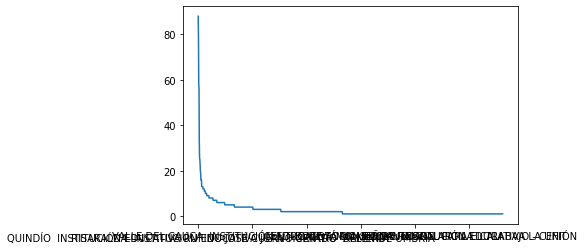

In [85]:
df_EDU['nombre_entidad'].value_counts().plot()

In [86]:
lista = df_EDU['nombre_entidad'].value_counts().head(5).keys().tolist()

In [87]:
df_EDU.loc[df_EDU['nombre_entidad'].isin(lista), 'nombre_entidad']

26994    SECRETARIA DE EDUCACION DEL DISTRITO                                
27058    SECRETARIA DE EDUCACION DEL DISTRITO                                
27063    SECRETARIA DE EDUCACION DEL DISTRITO                                
27086    SECRETARIA DE EDUCACION DEL DISTRITO                                
27095    SECRETARIA DE EDUCACION DEL DISTRITO                                
27126    SECRETARIA DE EDUCACION DEL DISTRITO                                
27193    SECRETARIA DE EDUCACION DEL DISTRITO                                
27212    SECRETARIA DE EDUCACION DEL DISTRITO                                
27244    SECRETARIA DE EDUCACION DEL DISTRITO                                
27246    SECRETARIA DE EDUCACION DEL DISTRITO                                
27311    SECRETARIA DE EDUCACION DEL DISTRITO                                
27512    SECRETARIA DE EDUCACION DEL DISTRITO                                
28009    SECRETARIA DE EDUCACION DEL DISTRITO                   

In [88]:
df_EDU.loc[df_EDU['nombre_entidad'].isin(lista)].groupby([ 'anno_firma_contrato', 'nombre_entidad']).size()

anno_firma_contrato  nombre_entidad                                                      
2015                 QUINDÍO  INSTITUCIÓN EDUCATIVA CASD HERMOGENES MAZA  ARMENIA            12
                     QUINDÍO  INSTITUCIÓN EDUCATIVA GUSTAVO MATAMOROS DCOSTA  ARMENIA        1 
                     QUINDÍO  INSTITUCIÓN EDUCATIVA RUFINO JOSÉ CUERVO CENTRO  ARMENIA       6 
2016                 QUINDÍO  INSTITUCIÓN EDUCATIVA CASD HERMOGENES MAZA  ARMENIA            18
                     QUINDÍO  INSTITUCIÓN EDUCATIVA GUSTAVO MATAMOROS DCOSTA  ARMENIA        12
                     QUINDÍO  INSTITUCIÓN EDUCATIVA RUFINO JOSÉ CUERVO CENTRO  ARMENIA       11
                     RISARALDA  INSTITUCIÓN EDUCATIVA INSTITUTO TÉCNICO SUPERIOR  PEREIRA    5 
2017                 QUINDÍO  INSTITUCIÓN EDUCATIVA CASD HERMOGENES MAZA  ARMENIA            13
                     QUINDÍO  INSTITUCIÓN EDUCATIVA GUSTAVO MATAMOROS DCOSTA  ARMENIA        9 
                     QUINDÍO  INSTITUCIÓN EDUC

In [89]:
df_EDU.loc[df_EDU['nombre_entidad'].isin(lista)].groupby([ 'anno_firma_contrato', 'nombre_entidad']).size().unstack()

nombre_entidad       QUINDÍO  INSTITUCIÓN EDUCATIVA CASD HERMOGENES MAZA  ARMENIA  \
anno_firma_contrato                                                                 
2015                12.00                                                           
2016                18.00                                                           
2017                13.00                                                           
2018                9.00                                                            
2019                1.00                                                            
2020                1.00                                                            
2021                1.00                                                            
2022                1.00                                                            

nombre_entidad       QUINDÍO  INSTITUCIÓN EDUCATIVA GUSTAVO MATAMOROS DCOSTA  ARMENIA  \
anno_firma_contrato                                                                     
2015                1.00                                                                
2016                12.00                                                               
2017                9.00                                                                
2018                12.00                                                               
2019                13.00                                                               
2020                12.00                                                               
2021                13.00                                                               
2022                7.00                                                                

nombre_entidad       QUINDÍO  INSTITUCIÓN EDUCATIVA RUFINO JOSÉ CUERVO CENTRO  ARMENIA  \
anno_firma_contrato                                                                      
2015                6.00                                                                 
2016                11.00                                                                
2017                11.00                                                                
2018                14.00                                                                
2019                13.00                                                                
2020                14.00                                                                
2021                12.00                                                                
2022                7.00                                                                 

nombre_entidad       RISARALDA  INSTITUCIÓN EDUCATIVA INSTITUTO TÉCNICO SUPERIOR  PEREIRA  \
anno_firma_contrato                                                                         
2015                NaN                                                                     
2016                5.00                                                                    
2017                6.00                                                                    
2018                6.00                                                                    
2019                6.00                                                                    
2020                4.00                                                                    
2021                5.00                                                                    
2022                1.00                                                                    

nombre_entidad       SECRETARIA DE EDUCACION DEL DISTRITO  
anno_firma_contrato                                        
2015                NaN                                    
2016                NaN                                    
2017                NaN                                    
2018                17.00                                  
2019                13.00                                  
2020  

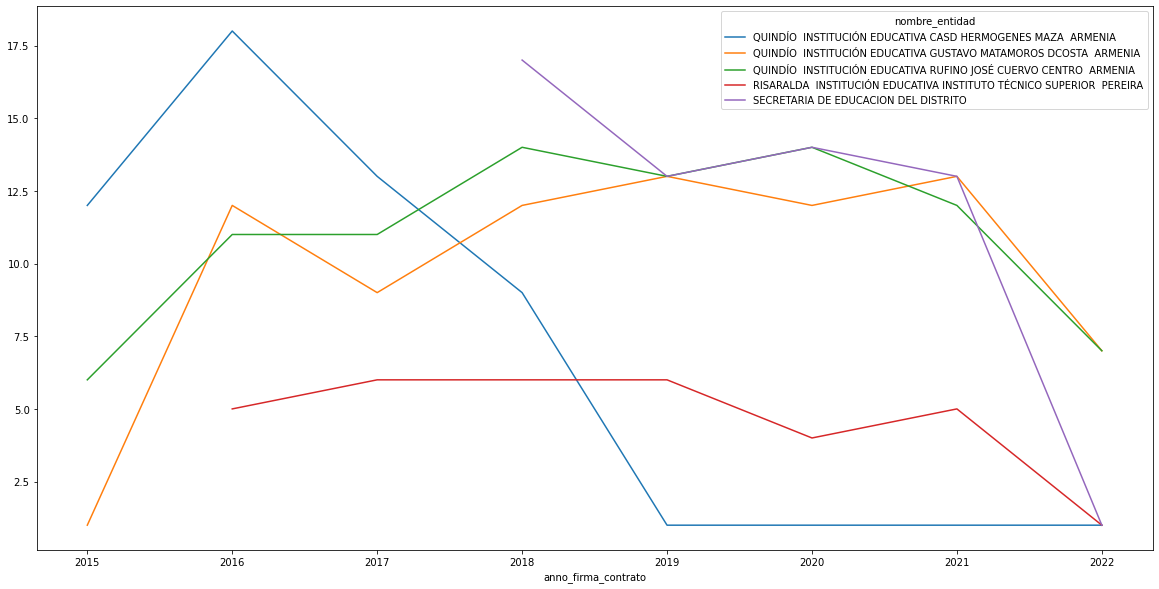

In [90]:
df_EDU.loc[df_EDU['nombre_entidad'].isin(lista)].groupby([ 'anno_firma_contrato', 'nombre_entidad']).size().unstack().plot(figsize = (20, 10))

## Clasificacion de entidades por tipo

In [91]:
#], 'entidad_centralizada'])
df_EDU.drop_duplicates(['nombre_entidad']).groupby('orden').size()


orden
Nacional       36  
Territorial    1087
dtype: int64

In [92]:
# Cantidad de entidades que contratan servicios de seguridad por orden nacional o territorial
df_EDU.drop_duplicates(['nombre_entidad']).groupby(['orden','entidad_centralizada']).size()

orden        entidad_centralizada         
Nacional     CENTRALIZADO                     12 
             Centralizada                     5  
             DESCENTRALIZADO                  9  
             Descentralizada                  8  
             No Definido                      2  
Territorial  CENTRALIZADO                     9  
             Centralizada                     8  
             DEPARTAMENTAL CENTRALIZADO       259
             DEPARTAMENTAL DESCENTRALIZADO    639
             DESCENTRALIZADO                  19 
             DISTRITAL MUNICIPAL NIVEL 1      9  
             DISTRITAL MUNICIPAL NIVEL 2      24 
             DISTRITAL MUNICIPAL NIVEL 4      1  
             DISTRITAL MUNICIPAL NIVEL 5      4  
             DISTRITAL MUNICIPAL NIVEL 6      9  
             DISTRITO CAPITAL                 82 
             Descentralizada                  24 
dtype: int64

In [93]:
#codigo de la entidad
df_EDU.groupby(['orden', 'entidad_centralizada', 'codigo_entidad', 'nombre_entidad']).size()

orden        entidad_centralizada           codigo_entidad  nombre_entidad                                                                                                                             
Nacional     CENTRALIZADO                   22574020        CUNDINAMARCA  INSTITUCIÓN EDUCATIVA DEPARTAMENTAL SAN BENITO  SIBATÉ                                                                           1 
                                            105003000       ESCUELA SUPERIOR DE ADMINISTRACIÓN PÚBLICA ESAP                                                                                                4 
                                            105088017       ANTIOQUIA  INSTITUCIÓN EDUCATIVA LA UNION  BELLO                                                                                               2 
                                            110005000       CORPORACIÓN NASA KIE NASA KIE                                                                                             

In [94]:
df_EDU['Tipo_servicio'].value_counts().to_csv('test2.csv')
df_EDU['Tipo_servicio'].value_counts()

Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada    1555
Servicio de Vigilancia y Seguridad Privada                                                                         1387
Servicio de Asesoria, Consultoria e Investigacion                                                                  15  
Servicio de Capacitacion y Entrenamiento en Vigilancia y Seguridad Privada                                         6   
Servicio de Transporte de Valores                                                                                  1   
Name: Tipo_servicio, dtype: int64

In [95]:
#df_EDU['tipo_de_contrato'].value_counts()
df_EDU.groupby(['Tipo_servicio', 'tipo_de_contrato']).size().to_frame() #.to_csv('test2.csv')

0
Tipo_servicio                                                                                                   tipo_de_contrato             
Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada Compraventa              400 
                                                                                                                DecreeLaw092/2017        2   
                                                                                                                Obra                     21  
                                                                                                                Otro                     1   
                                                                                                                Otro Tipo de Contrato    16  
                                                                                                                Prestación de Servicios  518 
                                                                                                                Suministros              597 
Servicio de Asesoria, Consultoria e Investigacion                                                               Prestación de Servicios  15  
Servicio de Capacitacion y Entrenamiento en Vigilancia y Seguridad Privada                                      DecreeLaw092/2017        1   
                                                                                                                Prestación de Servicios  5   
Servicio de Transporte de Valores                                                                               Prestación de Servicios  1   
Servicio de Vigilancia y Seguridad Privada                                                                      Comodato                 1   
                                                                                                                Compraventa              29  
                                                                                                                Obra                     11  
                                                                                                                Otro                     4   
                                                                                                                Otro Tipo de Contrato    23  
                                                                                                                Prestación de Servicios  1245
                                                                                                                Suministros              74

In [96]:
df_EDU.loc[df_EDU['tipo_de_contrato'] == 'DecreeLaw092/2017']

uid numero_de_constancia numero_de_proceso  \
27204  CO1.PCCNTR.2712290  NaN                  NaN                
29910  CO1.PCCNTR.3894754  NaN                  NaN                
30301  CO1.PCCNTR.2992347  NaN                  NaN                

      numero_de_contrato  anno_firma_contrato  anno_cargue_secop        orden  \
27204  NaN                2021                 2021               Territorial   
29910  NaN                2022                 2022               Nacional      
30301  NaN                2021                 2019               Territorial   

      entidad_centralizada  \
27204  Descentralizada       
29910  Centralizada          
30301  Centralizada          

                                                  nombre_entidad nit_entidad  \
27204  GOBERNACION DEL VALLE DEL CAUCA - SECRETARIA DE EDUCACION  890399029    
29910  INSTITUCION EDUCATIVA SOLEDAD ACOSTA DE SAMPER             806011971    
30301  INSITUCION EDUCATIVA JOHN F KENNEDY DE SOLEDAD             802003907    

       codigo_entidad                    modalidad_de_contratacion  \
27204  709360457       Contratación régimen especial (con ofertas)   
29910  705049609       Contratación régimen especial                 
30301  708914908       Contratación régimen especial                 

      estado_contrato justificacion_modalidad_de  \
27204  En ejecución    Decree092/2017              
29910  Activo          Decree092/2017              
30301  En ejecución    Decree092/2017              

                                                                                                                                                                                                                                                                                                                                         objeto_del_contrato  \
27204  AUNAR ESFUERZOS TÉCNICOS ADMINISTRATIVOS Y FINANCIEROS PARA EL DESARROLLO DE ESTRATEGIAS QUE PERMITAN EL FORTALECIMIENTO EN LA IMPLEMENTACIÓN DE GESTIÓN DE SEGURIDAD Y SALUD EN EL TRABAJO EN LA SEDE CENTRAL DE LA SECRETARÍA DE EDUCACIÓN DEPARTAMENTAL Y EN 149 INSTITUCIONES EDUCATIVAS DE LOS 34 MUNICIPIOS NO CERTIFICADOS DEL VALLE DEL CAUCA   
29910  MANTENIMIENTO PREVENTIVO CORRECTIVO CON SUMINISTRO DE MATERIALES TECNICOS Y TECNOLOGICOS DEL SISTEMA DE CCTV E INTERNET DE SEDE PRINCIPAL DE LA INSTITUCIÓN EDUCATIVA                                                                                                                                                                                   
30301  SUMINISTRO E INSTALACION DE EQUIPOS DE SEGURIDAD ELECTRONICA PARA SER INTEGRADOS AL SISTEMA DE VIDEOVIGILANCIA COMPRA DE TELEVISOR Y CAMARAS                                                                                                                                                                                                            

                                                                                                                                                                                                                                                                                            descripcion_del_proceso  \
27204  AUNAR ESFUERZOS TÉCNICOS  ADMINISTRATIVOS Y FINANCIEROS PARA EL DESARROLLO DE ESTRATEGIAS QUE PERMITAN EL FORTALECIMIENTO EN LA IMPLEMENTACIÓN DE GESTIÓN DE SEGURIDAD Y SALUD EN EL TRABAJO EN LA SEDE CENTRAL DE LA SECRETARÍA DE EDUCACIÓN DEPARTAMENTAL Y EN 149 INSTITUCIONES EDUCATIVAS DE LOS 34 MUN   
29910  MANTENIMIENTO PREVENTIVO  CORRECTIVO CON SUMINISTRO DE MATERIALES TECNICOS Y TECNOLOGICOS DEL SISTEMA DE CCTV E INTERNET DE SEDE PRINCIPAL DE LA INSTITUCIÓN EDUCATIVA                                                                                                                                         
30301  Suministros e Instalación de Equipos de Seguridad Electrónica Educativa: Acces Point con Entrada RJ45 (Amplificador de Señal)  Cámara tipo Mini

In [97]:
df_EDU['estado_contrato'].value_counts()

Celebrado                 1644
Liquidado                 1079
En ejecución              82  
Modificado                79  
Convocado                 37  
terminado                 17  
Activo                    11  
Terminado sin Liquidar    8   
Cerrado                   3   
cedido                    2   
Suspendido                1   
Adjudicado                1   
Name: estado_contrato, dtype: int64

In [98]:
df_EDU['modalidad_de_contratacion'].value_counts()

Contratación régimen especial                                  2382
Contratación Directa (Ley 1150 de 2007)                        191 
Contratación Mínima Cuantía                                    131 
Licitación Pública                                             123 
Selección Abreviada de Menor Cuantía (Ley 1150 de 2007)        81  
Mínima cuantía                                                 36  
Contratación régimen especial (con ofertas)                    9   
Subasta                                                        4   
Contratación Directa (con ofertas)                             2   
Selección abreviada subasta inversa                            2   
Contratos y convenios con más de dos partes                    2   
Seleccion Abreviada Menor Cuantia Sin Manifestacion Interes    1   
Name: modalidad_de_contratacion, dtype: int64

In [99]:
df_EDU.groupby(['modalidad_de_contratacion', 'estado_contrato']).size().to_frame().unstack()

0             \
estado_contrato                                             Activo Adjudicado   
modalidad_de_contratacion                                                       
Contratación Directa (Ley 1150 de 2007)                     1.00   NaN          
Contratación Directa (con ofertas)                          NaN    NaN          
Contratación Mínima Cuantía                                 NaN    NaN          
Contratación régimen especial                               3.00   NaN          
Contratación régimen especial (con ofertas)                 2.00   NaN          
Contratos y convenios con más de dos partes                 NaN    NaN          
Licitación Pública                                          NaN    NaN          
Mínima cuantía                                              2.00   NaN          
Seleccion Abreviada Menor Cuantia Sin Manifestacion Interes NaN    NaN          
Selección Abreviada de Menor Cuantía (Ley 1150 de 2007)     2.00   1.00         
Selección abreviada subasta inversa                         1.00   NaN          
Subasta                                                     NaN    NaN          

                                                                               \
estado_contrato                                             Celebrado Cerrado   
modalidad_de_contratacion                                                       
Contratación Directa (Ley 1150 de 2007)                     110.00    1.00      
Contratación Directa (con ofertas)                          NaN       NaN       
Contratación Mínima Cuantía                                 66.00     NaN       
Contratación régimen especial                               1,387.00  NaN       
Contratación régimen especial (con ofertas)                 NaN       NaN       
Contratos y convenios con más de dos partes                 2.00      NaN       
Licitación Pública                                          46.00     NaN       
Mínima cuantía                                              NaN       NaN       
Seleccion Abreviada Menor Cuantia Sin Manifestacion Interes NaN       NaN       
Selección Abreviada de Menor Cuantía (Ley 1150 de 2007)     29.00     2.00      
Selección abreviada subasta inversa                         NaN       NaN       
Subasta                                                     4.00      NaN       

                                                                       \
estado_contrato                                             Convocado   
modalidad_de_contratacion                                               
Contratación Directa (Ley 1150 de 2007)                     NaN         
Contratación Directa (con ofertas)                          NaN         
Contratación Mínima Cuantía                                 4.00        
Contratación régimen especial                               33.00       
Contratación régimen especial (con ofertas)                 NaN         
Contratos y convenios con más de dos partes                 NaN         
Licitación Pública                                          NaN         
Mínima cuantía                                              NaN         
Seleccion Abreviada Menor Cuantia Sin Manifestacion Interes NaN         
Selección Abreviada de Menor Cuantía (Ley 1150 de 2007)     NaN         
Selección abreviada subasta inversa                         NaN         
Subasta                                                     NaN         

                                                                          \
estado_contrato                                             En ejecución   
modalidad_de_contratacion                                                  
Contratación Directa (Ley 1150 de 2007)                     17.00          
Contratación Directa (con ofertas)                          NaN            
Contratación Mínima Cuantía                                 NaN            
Contratación régimen especial                               4.00           
Contr

In [100]:
df_EDU['justificacion_modalidad_de'].value_counts()

Equipos y Suministros de Defensa, Orden Publico, Proteccion, Vigilancia y Seguridad           1258
Servicios de Defensa Nacional, Orden Publico, Seguridad y Vigilancia                          1248
Servicios de Edificación, Construcción de Instalaciones y Mantenimiento                       262 
Ley 1150 de 2007                                                                              70  
Presupuesto inferior al 10% de la menor cuantía                                               36  
Presupuesto menor al 10% de la Menor Cuantía                                                  31  
ServiciosProfesionales                                                                        30  
Regla aplicable                                                                               15  
Decree092/2017                                                                                3   
Suministro de bienes y servicios de características técnicas uniformes y común utilización    2   
Defensa y 

In [101]:
df_EDU['objeto_del_contrato'].value_counts()

Output hidden; open in https://colab.research.google.com to view.

In [102]:
df_EDU['descripcion_del_proceso'].value_counts()

Output hidden; open in https://colab.research.google.com to view.

In [103]:
df_EDU.groupby(['Tipo_servicio', 'nombre_clase']).size().to_frame()

0
Tipo_servicio                                                                                                   nombre_clase                                                                         
Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada Alarmas de seguridad                                                             1   
                                                                                                                Candados                                                                         1   
                                                                                                                Cerraduras elementos de seguridad y accesorios                                   220 
                                                                                                                Cerraduras, elementos de seguridad y accesorios                                  3   
                                                                                                                Cámaras de seguridad                                                             2   
                                                                                                                Equipo de vigilancia y detección                                                 1049
                                                                                                                Equipo y accesorios y suministros de control de explosivos                       1   
                                                                                                                Llaves                                                                           1   
                                                                                                                Servicio de instalación de sistemas de control de acceso                         2   
                                                                                                                Servicio de instalación y mantenimiento de sistemas instrumentados de seguridad  3   
                                                                                                                Servicios de instalación de sistemas de seguridad física e industrial            263 
                                                                                                                Sistema de monitoreo de comunicaciones por radio                                 3   
                                                                                                                Sistema de señalización inalámbrica para sordos                                  1   
                                                                                                                Sistema de televisión de circuito cerrado cctv                                   1   
                                                                                                                Sistemas de alarma                                                               1   
                                                                                                                Sistemas de seguridad o de control de acceso                                     3   
Servicio de Asesoria, Consultoria e Investigacion                                                               Análisis de riesgo o seguridad                                                   7   
                                                                                                                Servicios de comprobación de referencias o antecedentes                          3   
                                                                                                                Servicios de detectives                                                          1   
                                      

In [104]:
df_EDU.groupby(['id_clase', 'nombre_clase', 'identificacion_contratista', 'nom_razon_social_contratista']).size() #'identificacion_representante_legal'

id_clase  nombre_clase                                                                     identificacion_contratista  nom_razon_social_contratista                                                                    
461518    Equipo y accesorios y suministros de control de explosivos                       42101468                    SANDRA PATRICIA JARAMILLO GRANADA                                                                   1 
461715    Candados                                                                         901121107                   CYR INTEGRANDO SOLUCIONES S.A.S.                                                                    1 
          Cerraduras elementos de seguridad y accesorios                                   1007112612                  CRISTINA CAMPERO ISABEL CARO                                                                        1 
                                                                                           10088574                   

## Caninos

In [105]:
# Instituciones que incluyen la descripcion 'canino' en la especificación del contrato:
print(df_EDU.loc[(df_EDU['objeto_del_contrato'].str.lower().str.contains('cani'))  | (dataframe_SECOP['descripcion_del_proceso'].str.lower().str.contains('cani')), 'nombre_entidad'].shape)
df_EDU.loc[(df_EDU['objeto_del_contrato'].str.lower().str.contains('cani'))  | (dataframe_SECOP['descripcion_del_proceso'].str.lower().str.contains('cani')), 'nombre_entidad'].values #

(14,)


array(['CENTRO DE FORMACION INTEGRAL PARA EL TRABAJO - CEFIT',
       'ESCUELA SUPERIOR TECNOLOGICA DE ARTES DEBORA ARANGO',
       'CORPORACIÓN NASA KIE NASA KIE',
       'ESCUELA TECNOLÓGICA INSTITUTO TÉCNICO CENTRAL ITC',
       'MINISTERIO DE EDUCACIÓN NACIONAL MEN',
       'ANTIOQUIA  ESCUELA SUPERIOR TECNOLÓGICA DE ARTES DÉBORA ARANGO  MEDELLÍN',
       'ANTIOQUIA  ESCUELA SUPERIOR TECNOLÓGICA DE ARTES DÉBORA ARANGO  MEDELLÍN',
       'HUILA  INSTITUCIÓN EDUCATIVA LA PRADERA  TARQUI',
       'ANTIOQUIA  ESCUELA SUPERIOR TECNOLÓGICA DE ARTES DÉBORA ARANGO  MEDELLÍN',
       'ESCUELA TECNOLÓGICA INSTITUTO TÉCNICO CENTRAL ITC',
       'ANTIOQUIA  ESCUELA SUPERIOR TECNOLÓGICA DE ARTES DÉBORA ARANGO  MEDELLÍN',
       'ESCUELA TECNOLÓGICA INSTITUTO TÉCNICO CENTRAL ITC',
       'ESCUELA TECNOLÓGICA INSTITUTO TÉCNICO CENTRAL ITC',
       'BOLÍVAR  ESCUELA TALLER CARTAGENA DE INDIAS  CARTAGENA'],
      dtype=object)

In [106]:
# estudiar el comportamiento de los contratos que tienen la variable 'nombre_clase' == 'alquiler de perros guardianes' 
df_EDU.loc[df_EDU['nombre_clase'] == 'alquiler de perros guardianes' , 'nombre_entidad'].values #

array([], dtype=object)

## Tamaño del gasto en el sector educativo

In [107]:
df_EDU.groupby(['Tipo_servicio'])['Valor_Contrato_Presente_2020'].sum()

Tipo_servicio
Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada   13,224,692,408.55   
Servicio de Asesoria, Consultoria e Investigacion                                                                 771,753,152.92      
Servicio de Capacitacion y Entrenamiento en Vigilancia y Seguridad Privada                                        8,078,661,697.71    
Servicio de Transporte de Valores                                                                                 183,911.90          
Servicio de Vigilancia y Seguridad Privada                                                                        1,204,829,586,796.85
Name: Valor_Contrato_Presente_2020, dtype: float64

In [108]:
df_EDU.groupby(['Tipo_servicio', 'tipo_de_contrato'])['Valor_Contrato_Presente_2020'].sum().to_frame()

Valor_Contrato_Presente_2020
Tipo_servicio                                                                                                   tipo_de_contrato                                     
Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada Compraventa             4,287,621,825.68             
                                                                                                                DecreeLaw092/2017       2,657,311.76                 
                                                                                                                Obra                    756,244,434.70               
                                                                                                                Otro                    489,717,002.76               
                                                                                                                Otro Tipo de Contrato   85,981,168.03                
                                                                                                                Prestación de Servicios 3,261,376,218.73             
                                                                                                                Suministros             4,341,094,446.89             
Servicio de Asesoria, Consultoria e Investigacion                                                               Prestación de Servicios 771,753,152.92               
Servicio de Capacitacion y Entrenamiento en Vigilancia y Seguridad Privada                                      DecreeLaw092/2017       7,980,466,292.62             
                                                                                                                Prestación de Servicios 98,195,405.08                
Servicio de Transporte de Valores                                                                               Prestación de Servicios 183,911.90                   
Servicio de Vigilancia y Seguridad Privada                                                                      Comodato                0.00                         
                                                                                                                Compraventa             263,920,436.62               
                                                                                                                Obra                    109,922,875.39               
                                                                                                                Otro                    9,390,534,481.56             
                                                                                                                Otro Tipo de Contrato   114,745,010.59               
                                                                                                                Prestación de Servicios 1,194,418,423,022.48         
                                                                                                                Suministros             532,040,970.22

In [109]:
df_EDU.groupby('rama')['Valor_Contrato_Presente_2020'].sum()

rama
Corporación Autónoma   13,484,589,704.57 
Ejecutivo              842,656,128,914.59
Name: Valor_Contrato_Presente_2020, dtype: float64

In [110]:
df_EDU.groupby('orden')['Valor_Contrato_Presente_2020'].sum()

orden
Nacional      72,130,259,822.43   
Territorial   1,154,774,618,145.50
Name: Valor_Contrato_Presente_2020, dtype: float64

In [111]:
df_EDU.groupby('sector')['Valor_Contrato_Presente_2020'].sum()

sector
Educación Nacional                                   853,604,880,177.55
Servicio Público                                     732,209,192.40    
Tecnologías de la Información y las Comunicaciones   193,168,555.18    
deportes                                             1,610,460,694.03  
Name: Valor_Contrato_Presente_2020, dtype: float64

In [112]:
#'Departamento'
df_EDU.groupby(['departamento_entidad'])['Valor_Contrato_Presente_2020'].agg(sum).to_frame()

Valor_Contrato_Presente_2020
departamento_entidad                                                 
Amazonas                                76,619,843.10                
Antioquia                               16,489,335,491.87            
Arauca                                  209,761,397.82               
Atlántico                               530,765,638.66               
Bogotá D.C.                             1,085,427,181,482.67         
Bolívar                                 13,298,941,022.96            
Boyacá                                  537,080,307.70               
Caldas                                  486,129,020.66               
Casanare                                194,490,328.97               
Cauca                                   1,743,246,237.42             
Cesar                                   93,661,738.94                
Cundinamarca                            67,966,619,115.42            
Córdoba                                 153,290,010.43               
Guaviare                                5,045,810.07                 
Huila                                   1,601,259,402.05             
La Guajira                              16,158,308,530.67            
Meta                                    805,014,821.25               
Nariño                                  225,152,554.84               
Norte De Santander                      1,133,038,446.62             
Putumayo                                39,376,896.85                
Quindío                                 578,485,189.50               
Risaralda                               543,345,903.87               
San Andrés Providencia y Santa Catalina 404,517,405.21               
Santander                               1,038,734,118.59             
Sucre                                   481,715,934.27               
Tolima                                  2,129,034,160.19             
Valle del Cauca                         14,554,727,157.33

In [113]:
#municipio_entidad
df_EDU.groupby(['municipio_entidad'])['Valor_Contrato_Presente_2020'].agg(sum)

municipio_entidad
Acacías                       44,346,905.85     
Acevedo                       31,768,315.79     
Agrado                        24,634,716.03     
Aguachica                     5,144,858.70      
Aguadas                       18,353,901.91     
Algeciras                     10,176,520.36     
Almeida                       3,217,722.85      
Altamira                      15,844,202.76     
Alvarado                      15,425,783.54     
Andalucía                     272,653.83        
Anolaima                      3,497,211.87      
Anserma                       5,075,725.74      
Anzoátegui                    10,970,748.46     
Apía                          6,831,350.40      
Aranzazu                      7,946,407.07      
Arauca                        99,502,815.23     
Arauquita                     18,595,216.21     
Armenia                       395,766,732.08    
Armero                        13,600,409.15     
Balboa                        4,393,206.07      
Ba

In [114]:
#estado_contrato
df_EDU.groupby(['Database', 'anno_firma_contrato', 'estado_contrato'])['Valor_Contrato_Presente_2020'].agg(sum).to_frame().reset_index()
# ajustar por año

Database  anno_firma_contrato         estado_contrato  \
0   SECOP_I   2014                 Celebrado                
1   SECOP_I   2015                 Celebrado                
2   SECOP_I   2015                 Liquidado                
3   SECOP_I   2016                 Celebrado                
4   SECOP_I   2016                 Liquidado                
5   SECOP_I   2016                 Terminado sin Liquidar   
6   SECOP_I   2017                 Celebrado                
7   SECOP_I   2017                 Liquidado                
8   SECOP_I   2017                 Terminado sin Liquidar   
9   SECOP_I   2018                 Celebrado                
10  SECOP_I   2018                 Liquidado                
11  SECOP_I   2019                 Celebrado                
12  SECOP_I   2019                 Convocado                
13  SECOP_I   2019                 Liquidado                
14  SECOP_I   2019                 Terminado sin Liquidar   
15  SECOP_I   2020                 Celebrado                
16  SECOP_I   2020                 Liquidado                
17  SECOP_I   2021                 Adjudicado               
18  SECOP_I   2021                 Celebrado                
19  SECOP_I   2021                 Convocado                
20  SECOP_I   2021                 Liquidado                
21  SECOP_I   2022                 Celebrado                
22  SECOP_I   2022                 Convocado                
23  SECOP_I   2022                 Liquidado                
24  SECOP_II  2018                 Activo                   
25  SECOP_II  2018                 Cerrado                  
26  SECOP_II  2018                 Modificado               
27  SECOP_II  2018                 terminado                
28  SECOP_II  2019                 Activo                   
29  SECOP_II  2019                 Cerrado                  
30  SECOP_II  2019                 Modificado               
31  SECOP_II  2019                 terminado                
32  SECOP_II  2020                 Activo                   
33  SECOP_II  2020                 Modificado               
34  SECOP_II  2020                 terminado                
35  SECOP_II  2021                 Activo                   
36  SECOP_II  2021                 En ejecución             
37  SECOP_II  2021                 Modificado               
38  SECOP_II  2021                 Suspendido               
39  SECOP_II  2021                 cedido                   
40  SECOP_II  2021                 terminado                
41  SECOP_II  2022                 Activo                   
42  SECOP_II  2022                 En ejecución             
43  SECOP_II  2022                 Modificado               
44  SECOP_II  2022                 cedido                   

    Valor_Contrato_Presente_2020  
0  15,116,566,028.92              
1  525,990,933.09                 
2  680,014,730.84                 
3  159,438,046,462.41             
4  2,121,291,737.11               
5  7,557,158.40                   
6  139,222,746,351.78             
7  7,015,011,392.65               
8  28,308,181.46                  
9  10,132,658,886.98              
10 5,040,809,994.75               
11 10,000,422,116.04              
12 5,900,334.46                   
13 3,901,440,917.34               
14 2,092,317.18                   
15 10,728,231,042.00              
16 1,052,803,326.00               
17 32,986,090.83                  
18 4,347,233,942.51               
19 124,385,090.82                 
20 323,808,336.81                 
21 843,836,302.34                 
22 33,591,552.39                  
23 38,426,121.65                  
24 38,527,321.82                  
25 135,601,261.67                 
26 164,851,012,111.70             
27 154,817,362.85                 
28 83,610,239.63                  
29 109,654,575.38                 
30 185,706,435,680.73             
31 447,237,597.98                 
32 165,635,960.00                 
33 184,

In [115]:
df_EDU.groupby(['Database', 'anno_firma_contrato', 'estado_contrato'])['Valor_Contrato_Presente_2020'].agg(sum).to_frame().reset_index().plot

In [116]:
df_EDU.groupby(['id_clase', 'nombre_clase'])['Valor_Contrato_Presente_2020'].size().to_frame()

Valor_Contrato_Presente_2020
id_clase nombre_clase                                                                                                 
461518   Equipo y accesorios y suministros de control de explosivos                       1                           
461715   Candados                                                                         1                           
         Cerraduras elementos de seguridad y accesorios                                   220                         
         Cerraduras, elementos de seguridad y accesorios                                  3                           
         Llaves                                                                           1                           
461716   Alarmas de seguridad                                                             1                           
         Cámaras de seguridad                                                             2                           
         Equipo de vigilancia y detección                                                 1049                        
         Sistema de monitoreo de comunicaciones por radio                                 3                           
         Sistema de señalización inalámbrica para sordos                                  1                           
         Sistema de televisión de circuito cerrado cctv                                   1                           
         Sistemas de alarma                                                               1                           
         Sistemas de seguridad o de control de acceso                                     3                           
721517   Servicio de instalación de sistemas de control de acceso                         2                           
         Servicio de instalación y mantenimiento de sistemas instrumentados de seguridad  3                           
         Servicios de instalación de sistemas de seguridad física e industrial            263                         
801117   Servicios de comprobación de referencias o antecedentes                          3                           
811418   Análisis de riesgo o seguridad                                                   7                           
861017   Servicios de capacitación en seguridad                                           6                           
921015   Servicios de vigilancia                                                          13                          
921215   Servicios de guardas de seguridad                                                29                          
         Servicios de guardias                                                            227                         
         Servicios de protección contra robos                                             14                          
921216   Servicios de detectives                                                          4                           
         Servicios de investigación privada                                               4                           
921217   Servicios de sistemas de seguridad                                               1098                        
         Vigilancia o mantenimiento o monitoreo de alarmas                                2                           
921218   Servicios de Carros blindados y transporte de valores                            2

Cuando se incluyeron contratos de Defensa dio estos valores:

In [117]:
df_EDU.groupby('rama')['Valor_Contrato_Presente_2020'].sum()

rama
Corporación Autónoma   13,484,589,704.57 
Ejecutivo              842,656,128,914.59
Name: Valor_Contrato_Presente_2020, dtype: float64

In [118]:
df_EDU.groupby('orden')['Valor_Contrato_Presente_2020'].sum()

orden
Nacional      72,130,259,822.43   
Territorial   1,154,774,618,145.50
Name: Valor_Contrato_Presente_2020, dtype: float64

In [119]:
df_EDU.groupby('sector')['Valor_Contrato_Presente_2020'].sum()

sector
Educación Nacional                                   853,604,880,177.55
Servicio Público                                     732,209,192.40    
Tecnologías de la Información y las Comunicaciones   193,168,555.18    
deportes                                             1,610,460,694.03  
Name: Valor_Contrato_Presente_2020, dtype: float64

In [120]:
df_EDU.groupby('Tipo_servicio')['Valor_Contrato_Presente_2020'].sum()

Tipo_servicio
Fabricacion, Importacion, Comercio, Arriendo e Instalación de Equipos para la Vigilancia y la Seguridad Privada   13,224,692,408.55   
Servicio de Asesoria, Consultoria e Investigacion                                                                 771,753,152.92      
Servicio de Capacitacion y Entrenamiento en Vigilancia y Seguridad Privada                                        8,078,661,697.71    
Servicio de Transporte de Valores                                                                                 183,911.90          
Servicio de Vigilancia y Seguridad Privada                                                                        1,204,829,586,796.85
Name: Valor_Contrato_Presente_2020, dtype: float64

In [121]:
#'Departamento'
df_EDU.groupby(['departamento_entidad'])['Valor_Contrato_Presente_2020'].agg(sum)

departamento_entidad
Amazonas                                  76,619,843.10       
Antioquia                                 16,489,335,491.87   
Arauca                                    209,761,397.82      
Atlántico                                 530,765,638.66      
Bogotá D.C.                               1,085,427,181,482.67
Bolívar                                   13,298,941,022.96   
Boyacá                                    537,080,307.70      
Caldas                                    486,129,020.66      
Casanare                                  194,490,328.97      
Cauca                                     1,743,246,237.42    
Cesar                                     93,661,738.94       
Cundinamarca                              67,966,619,115.42   
Córdoba                                   153,290,010.43      
Guaviare                                  5,045,810.07        
Huila                                     1,601,259,402.05    
La Guajira                        

In [122]:
#municipio_entidad
df_EDU.groupby(['municipio_entidad'])['Valor_Contrato_Presente_2020'].agg(sum)

municipio_entidad
Acacías                       44,346,905.85     
Acevedo                       31,768,315.79     
Agrado                        24,634,716.03     
Aguachica                     5,144,858.70      
Aguadas                       18,353,901.91     
Algeciras                     10,176,520.36     
Almeida                       3,217,722.85      
Altamira                      15,844,202.76     
Alvarado                      15,425,783.54     
Andalucía                     272,653.83        
Anolaima                      3,497,211.87      
Anserma                       5,075,725.74      
Anzoátegui                    10,970,748.46     
Apía                          6,831,350.40      
Aranzazu                      7,946,407.07      
Arauca                        99,502,815.23     
Arauquita                     18,595,216.21     
Armenia                       395,766,732.08    
Armero                        13,600,409.15     
Balboa                        4,393,206.07      
Ba

In [123]:
#estado_contrato
df_EDU.groupby(['Database', 'anno_firma_contrato', 'estado_contrato'])['Valor_Contrato_Presente_2020'].agg(sum)
# ajustar por año

Database  anno_firma_contrato  estado_contrato       
SECOP_I   2014                 Celebrado                15,116,566,028.92 
          2015                 Celebrado                525,990,933.09    
                               Liquidado                680,014,730.84    
          2016                 Celebrado                159,438,046,462.41
                               Liquidado                2,121,291,737.11  
                               Terminado sin Liquidar   7,557,158.40      
          2017                 Celebrado                139,222,746,351.78
                               Liquidado                7,015,011,392.65  
                               Terminado sin Liquidar   28,308,181.46     
          2018                 Celebrado                10,132,658,886.98 
                               Liquidado                5,040,809,994.75  
          2019                 Celebrado                10,000,422,116.04 
                               Convocado      

In [124]:
#modalidad_de_contratacion
df_EDU.groupby(['modalidad_de_contratacion'])['Valor_Contrato_Presente_2020'].agg(sum)

modalidad_de_contratacion
Contratación Directa (Ley 1150 de 2007)                       4,967,703,906.00    
Contratación Directa (con ofertas)                            4,809,240,481.10    
Contratación Mínima Cuantía                                   1,515,587,723.10    
Contratación régimen especial                                 16,482,380,536.98   
Contratación régimen especial (con ofertas)                   22,613,186,609.82   
Contratos y convenios con más de dos partes                   85,095,811.06       
Licitación Pública                                            1,161,977,558,266.85
Mínima cuantía                                                672,411,265.16      
Seleccion Abreviada Menor Cuantia Sin Manifestacion Interes   630,107,035.50      
Selección Abreviada de Menor Cuantía (Ley 1150 de 2007)       12,186,498,176.69   
Selección abreviada subasta inversa                           333,957,293.17      
Subasta                                                      

In [125]:
#'tipo_de_contrato'
df_EDU.groupby(['tipo_de_contrato'])['Valor_Contrato_Presente_2020'].agg(sum)

tipo_de_contrato
Comodato                  0.00                
Compraventa               4,551,542,262.30    
DecreeLaw092/2017         7,983,123,604.38    
Obra                      866,167,310.09      
Otro                      9,880,251,484.32    
Otro Tipo de Contrato     200,726,178.63      
Prestación de Servicios   1,198,549,931,711.11
Suministros               4,873,135,417.10    
Name: Valor_Contrato_Presente_2020, dtype: float64

In [126]:
df_EDU.groupby(['id_clase', 'nombre_clase'])['Valor_Contrato_Presente_2020'].sum()

id_clase  nombre_clase                                                                   
461518    Equipo y accesorios y suministros de control de explosivos                        1,035,229.12      
461715    Candados                                                                          7,090,617.93      
          Cerraduras elementos de seguridad y accesorios                                    778,377,934.46    
          Cerraduras, elementos de seguridad y accesorios                                   40,109,639.34     
          Llaves                                                                            2,595,250.40      
461716    Alarmas de seguridad                                                              7,040,036.68      
          Cámaras de seguridad                                                              184,830,387.55    
          Equipo de vigilancia y detección                                                  10,179,689,884.61 
          Sistema de m